<a href="https://colab.research.google.com/github/Rohan171819/Data-Science/blob/main/MNIST_Classification_Using_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [61]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [62]:
X_train.ndim

3

In [63]:
X_train.shape

(60000, 28, 28)

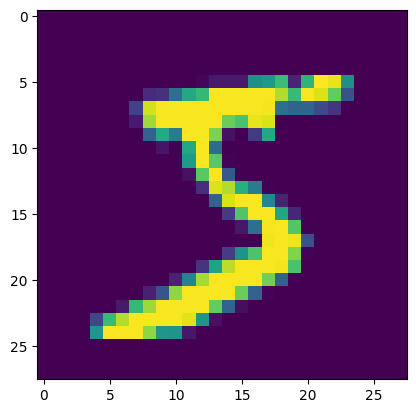

In [64]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [65]:
# Scaling the values.
X_train=X_train/255
X_test=X_test/255

In [66]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [67]:
model=Sequential()

In [68]:
# Flattning the Pixels values.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [70]:
#Compiling my Model.
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [71]:
#Training thr Model.
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2559 - accuracy: 0.9239 - val_loss: 0.1348 - val_accuracy: 0.9604
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1072 - accuracy: 0.9666 - val_loss: 0.1108 - val_accuracy: 0.9667
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0746 - accuracy: 0.9763 - val_loss: 0.0969 - val_accuracy: 0.9707
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9830 - val_loss: 0.0920 - val_accuracy: 0.9743
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.0891 - val_accuracy: 0.9744
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.1012 - val_accuracy: 0.9742
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0291 - accuracy: 0.9903 - val_loss: 0.1056 - val_accuracy:

In [72]:
Y_Probability=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [73]:
Y_Predicted=Y_Probability.argmax(axis=1)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_Predicted)

0.9781

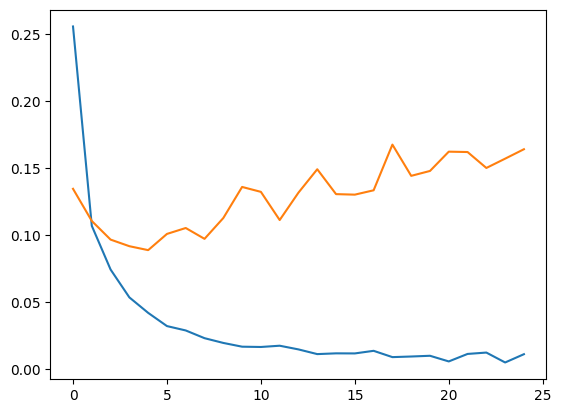

In [75]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

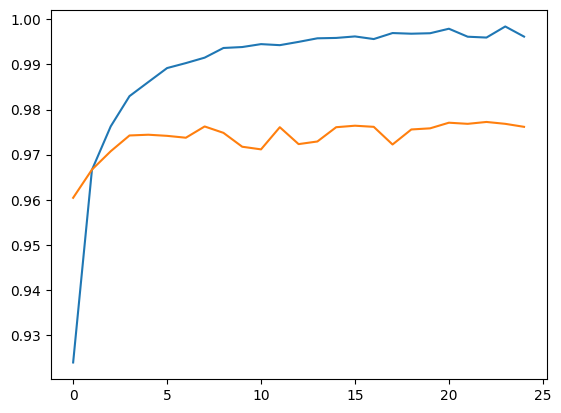

In [76]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])